**Student Placement Model**

**Importing models**


Let us import the models to  be used for the project 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from collections import Counter
from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


from tabulate import tabulate

import statsmodels.api as sm
from scipy import stats

**2. Importing data**

In [2]:
#reading the datasets
data1 = pd.read_csv("Book1.csv")
data2 = pd.read_csv("Book2.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Book1.csv'

In [3]:
#The first five rows of data
data2.head()

,Time,Indicator,Scale,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
0,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,KCSE Grade,units,315.0,3419.0,8298.0,16498.0,26347.0,36073.0,50041.0,71429.0,96865.0,148297.0,165351.0,30854.0
2,2019,KCSE Grade,units,631.0,5797.0,13367.0,24492.0,35378.0,46170.0,63157.0,83435.0,101793.0,137815.0,152402.0,29333.0
3,2020,KCSE Grade,units,893.0,6421.0,14427.0,25207.0,38196.0,57998.0,85459.0,109460.0,117889.0,121930.0,137343.0,28030.0
4,2021,KCSE Grade,units,1140.0,6060.0,13717.0,25236.0,39748.0,59875.0,81359.0,99435.0,116393.0,145994.0,187346.0,46198.0


In [4]:
#The last five rows of the data
data2.tail()

,Time,Indicator,Scale,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
1,2018,KCSE Grade,units,315.0,3419.0,8298.0,16498.0,26347.0,36073.0,50041.0,71429.0,96865.0,148297.0,165351.0,30854.0
2,2019,KCSE Grade,units,631.0,5797.0,13367.0,24492.0,35378.0,46170.0,63157.0,83435.0,101793.0,137815.0,152402.0,29333.0
3,2020,KCSE Grade,units,893.0,6421.0,14427.0,25207.0,38196.0,57998.0,85459.0,109460.0,117889.0,121930.0,137343.0,28030.0
4,2021,KCSE Grade,units,1140.0,6060.0,13717.0,25236.0,39748.0,59875.0,81359.0,99435.0,116393.0,145994.0,187346.0,46198.0
5,2022,KCSE Grade,units,1159.0,6684.0,16075.0,31448.0,48921.0,70218.0,95370.0,119200.0,134705.0,155034.0,167322.0,30538.0


# 3. Data Analysis

The following steps are aimed at discovering patterns and relationships in the data.

* First, we look for unique values

In [5]:
#Checking for unique values in the data set
dict = {}
for i in list(data2.columns):
    dict[i] = data2[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Time,6
Indicator,1
Scale,1
A,5
A-,5
B+,5
B,5
B-,5
C+,5
C,5


In [6]:
#now for the other data set
#Checking for unique values in the data set
dict1 = {}
for i in list(data1.columns):
    dict1[i] = data1[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

dict2 = {}
for i in list(data2.columns):
    dict2[i] = data2[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Time,6
Indicator,1
Scale,1
A,5
A-,5
B+,5
B,5
B-,5
C+,5
C,5


In [7]:
#next, we identify the data type of each column
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     object 
 1   Unnamed: 1  25 non-null     object 
 2   Unnamed: 2  25 non-null     float64
 3   Unnamed: 3  25 non-null     float64
 4   Unnamed: 4  25 non-null     float64
 5   Unnamed: 5  25 non-null     float64
 6   Unnamed: 6  25 non-null     float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 2.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       6 non-null      object 
 1   Indicator  5 non-null      object 
 2   Scale      5 non-null      object 
 3   A          5 non-null      float64
 4   A-         5 non-null      float64
 5   B+         5 non-null      float64
 6   B         

* Next, we convert all columns with the data type 'object' to the data type 'category'. This helps reduce memory usage.

In [8]:
data1['Unnamed: 0'] = data1['Unnamed: 0'].astype('category')
data1['Unnamed: 1'] = data1['Unnamed: 1'].astype('category')
data2['Time'] = data2['Time'].astype('category')
data2['Indicator'] = data2['Indicator'].astype('category')
data2['Scale'] = data2['Scale'].astype('category')

In [9]:
#lets confirm the chnages
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  25 non-null     category
 1   Unnamed: 1  25 non-null     category
 2   Unnamed: 2  25 non-null     float64 
 3   Unnamed: 3  25 non-null     float64 
 4   Unnamed: 4  25 non-null     float64 
 5   Unnamed: 5  25 non-null     float64 
 6   Unnamed: 6  25 non-null     float64 
 7   Unnamed: 7  0 non-null      float64 
dtypes: category(2), float64(6)
memory usage: 2.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Time       6 non-null      category
 1   Indicator  5 non-null      category
 2   Scale      5 non-null      category
 3   A          5 non-null      float64 
 4   A-         5 non-null      float64 
 5   B+         5 non-null      float

* Hadling missing values

In [10]:
#checking for missing values
data1.isnull().sum()
data2.isnull().sum()

Time         0
Indicator    1
Scale        1
A            1
A-           1
B+           1
B            1
B-           1
C+           1
C            1
C-           1
D+           1
D            1
D-           1
E            1
dtype: int64

In [11]:
#dropping th e columns with missing values
data1.dropna(inplace=True)
data2.dropna(inplace=True)
data1.isnull().sum()
data2.isnull().sum()

Time         0
Indicator    0
Scale        0
A            0
A-           0
B+           0
B            0
B-           0
C+           0
C            0
C-           0
D+           0
D            0
D-           0
E            0
dtype: int64

In [12]:
print(data2.columns)


Index(['Time', 'Indicator', 'Scale', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C',
       'C-', 'D+', 'D', 'D-', 'E'],
      dtype='object')


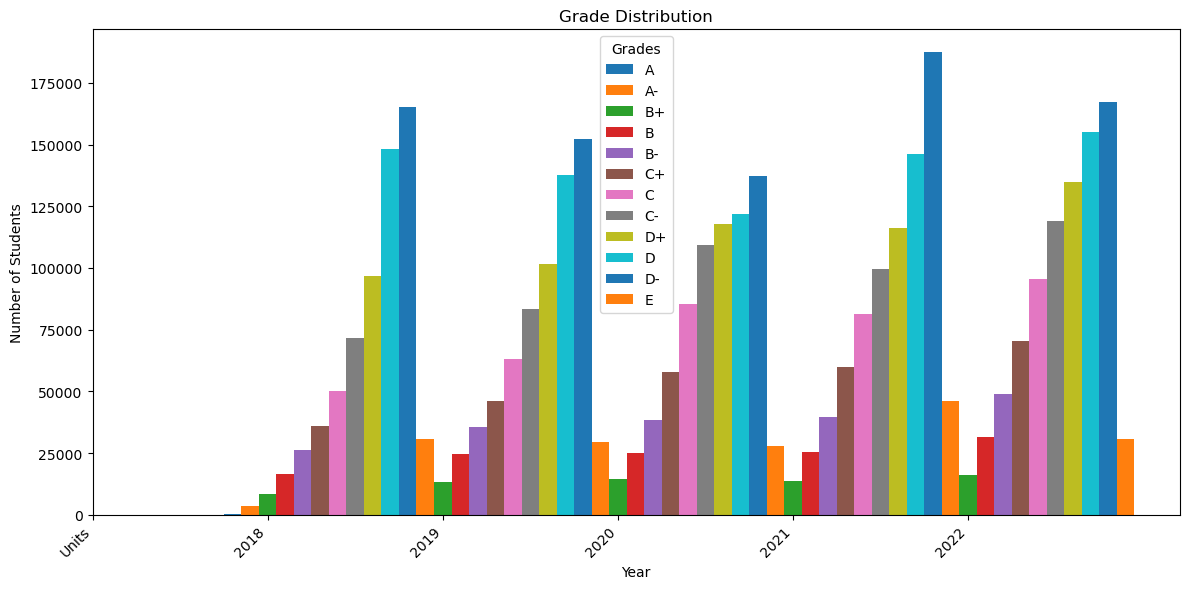

In [13]:
# we will then visualize the distribution of grades each year.
df = pd.read_csv('Book2.csv')
years = df['Time'].astype(str).tolist()
grades = {
    'A' : df['A'].tolist(),
    'A-' : df['A-'].tolist(),
    'B+' : df['B+'].tolist(),
    'B' : df['B'].tolist(),
    'B-' : df['B-'].tolist(),
    'C+' : df['C+'].tolist(),
    'C' : df['C'].tolist(),
    'C-' : df['C-'].tolist(),
    'D+' : df['D+'].tolist(),
    'D' : df['D'].tolist(),
    'D-' : df['D-'].tolist(),
    'E' : df['E'].tolist()
}
bar_width = 0.1
positions = range(len(years))
fig, ax = plt.subplots(figsize=(12,6))
for i,(grade, counts) in enumerate(grades.items()):
    ax.bar([p + i *bar_width for p in positions],counts,width=bar_width,
            label = grade) 
    
ax.set_xticks([p + 2*bar_width for p in positions])
ax.set_xticklabels(years, rotation=45,ha='right')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Students')
ax.set_title('Grade Distribution')
ax.legend(title='Grades')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


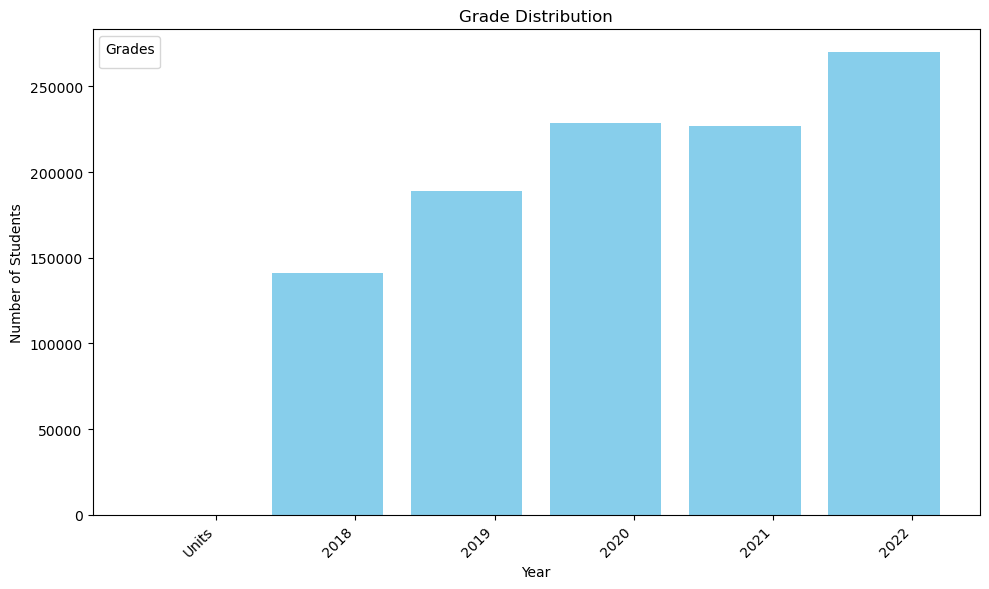

In [14]:
# next let us visualize the number of students who qaulified for university
# from the five years

df = pd.read_csv('Book2.csv')
df['Total'] = df[['A','A-','B+','B','B-','C+','C']].sum(axis=1)
years = df['Time'].astype(str).tolist()
totals = df['Total'].tolist()
bar_width = 0.1
positions = range(len(years))
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(years, totals,color='skyblue')
    
ax.set_xticks([p + 2*bar_width for p in positions])
ax.set_xticklabels(years, rotation=45,ha='right')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Students')
ax.set_title('Grade Distribution')
ax.legend(title='Grades')
plt.tight_layout()
plt.show() 

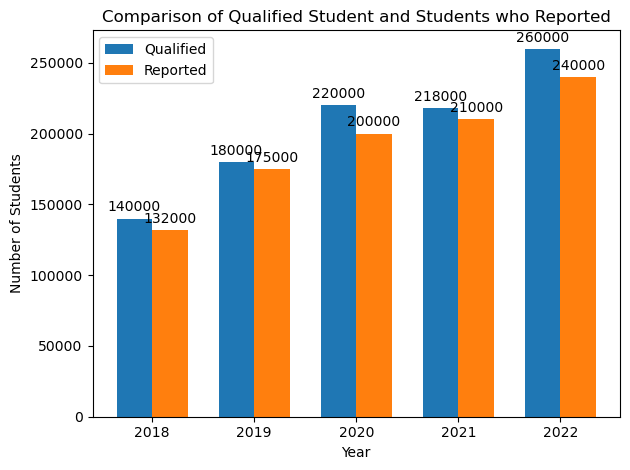

In [15]:
#let us show the relationship between the number of students 
# who qualified each year and those who reported

year = ['2018', '2019', '2020', '2021', '2022']
sales = [140000, 180000, 220000, 218000, 260000]
revenue = [132000, 175000, 200000, 210000, 240000]


x = np.arange(len(year))
width = 0.35  


fig, ax = plt.subplots()


bars1 = ax.bar(x - width/2, sales, width, label='Qualified')
bars2 = ax.bar(x + width/2, revenue, width, label='Reported')


ax.set_xlabel('Year')
ax.set_ylabel('Number of Students')
ax.set_title('Comparison of Qualified Student and Students who Reported')
ax.set_xticks(x)
ax.set_xticklabels(year)
ax.legend()

# Optionally, add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()

# Data Preprocessing
We do this to preoare it for model training

* Handling Outliers.
These are data points with extreme values. They usually occur uring data entry.
We handle outliers using the Interquartile Range (IQR) method.

<Axes: >

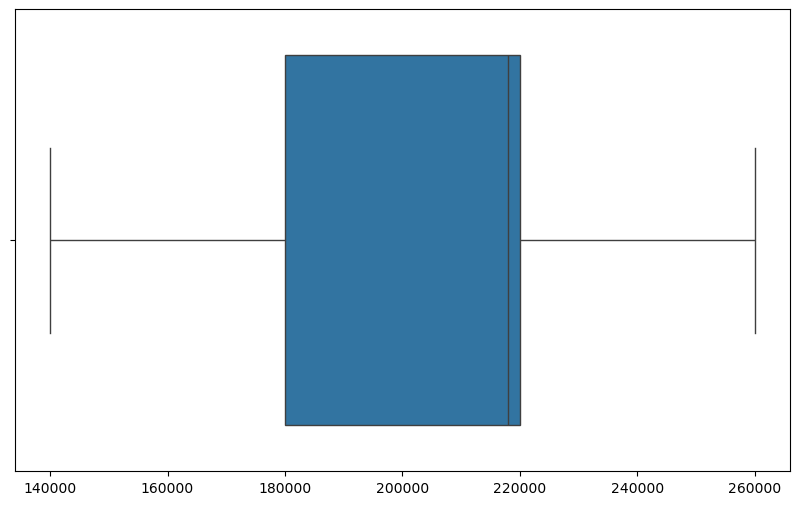

In [16]:
# First, we check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(sales,orient="h")

Our data does not have any outliers.


* Checking for skewness in numerical data


Skewed data impacts the performance of some ML models negatively. 
This is especially the case when using linear regression where we assume a normal distribution. 
We can handle skewness using the  Box Cox transformation.

In [21]:
data2.columns

Index(['Time', 'Indicator', 'Scale', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C',
       'C-', 'D+', 'D', 'D-', 'E'],
      dtype='object')

# Modelling

In [ ]:
#convert the data from columns in Book2.csv to a dataframe
data = {
    'Year':[2018, 2019, 2020, 2021, 2022],
    'A_Count':[315,631,893,1140,1159],
    'A-_Count':[3419, 5797, 6421, 6060, 6481],
    'B+_Count': [8298, 13367, 14427, 13717, 16075],
    'B_Count':[16498, 24492, 25207, 25236, 31448],
    'B-_Count':[26347, 35378,38196,39,748,48921],
    'C+_Count': [36073, 46170, 57998,59875,70218],
    'C_Count':[50041,63157,85459,81359,95370],
    'Course_Placement': ['Business', 'Medicine', 'Arts',
                         'Engineering', 'Medicine'] 

}
df = pd.DataFrame(data)

#Encoding the target variable, in this case, Course_Placement
le = LabelEncoder()
df['Course_Placement'] = le.fit_transform(df['Course_Placement'])

#Next we deal with the features(grade counts)
X = df[['A_Count', 'A-_Count', 'B+_Count', 'B_Count', 'B-_Count','C+_Count', 'C_Count' ]]
y = df['Course_Placement']

#Let's split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Next, we initialize and train a model, for this case, a Random Forest.
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

#Let's make predictions
y_pred = model.predict(X_test)

#Finall, we evaluate the model
print(classification_report(y_test,y_pred, target_names=le.classes_))

